In [320]:
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit
import math

%matplotlib inline

In [622]:
#os.listdir()
filename = "11_01_19-4.scan"

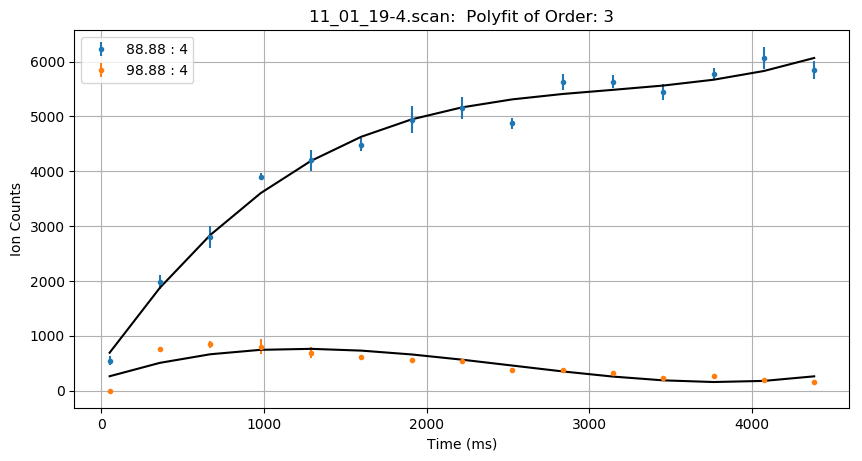

In [627]:
f = open(filename)
no_of_mass = 0
start = False
raw_datas = []
iterations = []
time = []

for line in f:

    if line.find("#mass")>=0:
        no_of_mass += 1
        tmp = line.split(":")[-1].strip()
        iterations.append(int(tmp))

    if not line[0] == "#" and not line == "\n":

        if line.strip() == "ALL:":
            start = True

        if not start:
            tmp = line.split()
            time.append(tmp)

        if start and not line.strip()=="ALL:":
            raw_datas.append(line)

f.close()

time = [float(i) for i in list(zip(*(time)))[0]]

all_datas = [[float(j) for j in i.split()] for i in raw_datas]
data_run_cycle = int(len(all_datas)/sum(iterations))

datas = [[[] for j in range(iterations[i])] for i in range(no_of_mass)]

k = 0
for i in range(no_of_mass):
    for j in range(iterations[i]):
        d = data_run_cycle
        datas[i][j] = all_datas[k:d+k]
        k += d

mass_values = [i[0][0][0] for i in datas]
data_sets = [list(zip(*datas[i])) for i in range(no_of_mass)]

mass_mean_adder, mass_mean, m = [], [], []
varience, varience_collector1, varience_collector2 = [], [], []

for i in range(no_of_mass):
    for k in range(data_run_cycle):
        for j in range(iterations[i]):

            #mass counts
            m_tmp = data_sets[i][k][j][2]
            mass_mean_adder.append(m_tmp)

            #varience
            varience_adder = mass_mean_adder

        m.append(sum(mass_mean_adder)/len(mass_mean_adder))
        mass_mean_adder = []

        #varience
        for v in range(iterations[i]):

            if iterations[i]>1:

                v_tmp = (varience_adder[v]-m[k])**2
                varience_collector1.append(v_tmp)

        if iterations[i]>1:
            varience_collector2.append(sum(varience_collector1)/(len(varience_collector1)-1))
        else: varience_collector2.append(0)

        varience_collector1 = []

    #mass counts
    mass_mean.append(m)
    m = []

    #varience
    varience.append(varience_collector2)
    varience_collector2 = []

#standard deviation
standard_deviation = [[math.sqrt(i) for i in j] for j in varience]

#standard error
standard_error = [[i/math.sqrt(k) for i in j] for j, k in zip(standard_deviation, iterations)]

if len(time)<len(mass_mean[0]):
    for i in range(no_of_mass):
        del mass_mean[i][-1]
        del standard_error[i][-1]

plt.figure(figsize=(10,5), dpi = 100)
deg = 3
for i in range(no_of_mass):
    if iterations[i]>1:
        x, y, err = time, mass_mean[i], standard_error[i]
        lg = "{} : {}".format(mass_values[i], iterations[i])
        
        plt.errorbar(x, y, yerr = err, fmt = ".", label = lg )
        
        z = np.polyfit(x, y, deg)
        p = np.poly1d(z)
        y_fit = [p(i) for i in x]
        
        plt.plot(x, y_fit, "k-")
        
plt.grid(True)
plt.xlabel("Time (ms)")
plt.ylabel("Ion Counts")
plt.legend()
plt.title(filename + ":  Polyfit of Order: %i"%deg)
plt.savefig(filename+".png")
plt.show()
plt.close()

Here


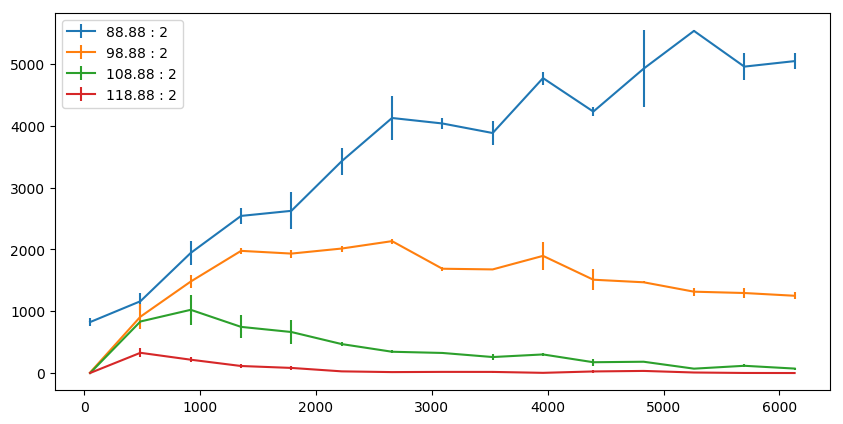

In [583]:

time, counts, error, no_of_mass, mass_values, iterations = timescanplot(filename)



In [495]:
tmp = [2174, 1758, 2212, 1750]
avg = sum(tmp)/len(tmp)
tmp1 = [(i-avg)**2 for i in tmp]
var = sum(tmp1)/(len(tmp1)-1)
std_d = math.sqrt(var)
std_e = std_d/math.sqrt(len(tmp))
var, varience[1][1], std_d, standard_deviation[1][1], std_e, standard_error[1][1]

(64491.666666666664,
 64491.666666666664,
 253.95209522007622,
 253.95209522007622,
 126.97604761003811,
 126.97604761003811)

In [517]:
f = open("11_01_19-4.scan")
time = []
for line in f:
    if not line[0] == "#" and not line == "\n":
        tmp = line.split()
        time.append(tmp)
        if line.strip() == "ALL:":
            del time[-1]
            break
f.close()

time

[50.0,
 359.4,
 668.8,
 978.1,
 1287.5,
 1596.9,
 1906.2,
 2215.6,
 2525.0,
 2834.4,
 3143.8,
 3453.1,
 3762.5,
 4071.9,
 4381.2]